In [1]:
from pylab import *
from scipy.integrate import *
import matplotlib.pyplot as plt
import random

Resuelva los siguientes ejercicios, explicando claramente su razonamiento.

1.Realice un notebook en el se programen y expliquen los siguientes algoritmos de integraci ́on de ecua-ciones diferenciales:

(a) Integración con método de Euler.

(b) Integración sobre serie de Taylor a 2◦ orden.

(c) Integración con método de Runge-Kutta de 2◦ orden.

(d) Integración con método de Runge-Kutta de 4◦ orden.

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para y(t):

$\ddot{x}+0.5\dot{x}+\sin(x)=e^{-t}\sin(3t)$.

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$.

(a) Primero programemos el algoritmo para la integración con el método de Euler: El Método de Euler pertenece al tipo de paso único, ya que el valor siguiente siempre se calcula con el valor presente.

Para este problema lo que requerimos es que la ecuación diferencial se pueda expresar en la forma $ x'(t)=g( x,t)$ y de modo que sea un intervalo de tiempo $[t_i, t_f]$ en el que nos interesa conocer la solucion y, además, tenemos que dividir segmentos de tamaño ("saltos") 'δ' tal que todo elemento '$t_{i}$' del dominio pueda ser escrito como: 
$$t_{i}=t_{0}+i δ$$.

Y la versión más simple para resolver una EDO de ese tipo es escribirla sustituyendo la definición de derivada y despejar la función evaluada en un tiempo posterior. 
$g( x(t),t)= x '(t) \approx = \frac{x(t+\delta)-x(t)}{\delta}$, por tanto, si despejamos $x(t+\delta)$, tenemos

$$
x(t+\delta) \approx \delta x'(t)+x(t)=\delta (x(t),t)+x(t).
$$

Entonces, si damos un valor inicial $x(0)$, podemos obtener $x(\delta)$,$x(2\delta)$. Como la derivada es la pendiente de la recta tangente a la curva, procedemos a definir una recta con pendiente igual al valor 
Una vez que se obtiene la solución aproximada en los puntos, la solución aproximada en otros puntos en el intervalo se puede encontrar a través de interpolación. En clase vimos el método de Euler mejorado en el que nosotros introducimos el Jacobiano de forma analítica para ser evaluado por el método de integral, donde nuestra ecuación diferencial tiene la forma 

$$
\frac{d\vec x_{n+1}}{dt}=g(\vec x,t).
$$

Y a partir de ahí,definimos la recurrencia, iterando este proceso se llega a una expresion general para obtener todos los puntos que queramos de la curva:

$$
\vec x_{n+1}=\vec x_n + \delta \vec g(\vec x_n, t_n)
$$

es decir,  desde una condicion inicial $x_0$ y $t_0$ se va, iterativamente, obteniendo los sucesivos valores.

In [2]:
def euler(f, t_intervalo, y0, delta=0.01): #Nuestra función depende de los aegu,entos 'df' (la primera derivada),
    #y la distancia entre puntos delta.
    t=arange(t_intervalo[0],t_intervalo[1]+delta,delta) #Se crea un arreglo con un numero de puntos entre el punto inicial y final de tiempo
    sol=zeros((len(y0),len(t))) #Se crean dos listas con los tiempos 't', para guardar
    sol[:,0]=y0 #Los primeros elementos de las listas seran los dados por las condiciones iniciales
    #con distancia 'delta' 
#las soluciones de las dos curvas 
    for i in range(0, len(t)-1): #Para rellenar el resto de puntos de la solucion (se quita el que ya agregamos)
        sol[:,i+1]= sol[:,i]+delta*f(t[i],sol[:,i]) #Definimos el metodo de Euler
    return (t,sol)

Ahora, para probar que nuestro algoritmo funciona resolvemos la ecuación diferencial:

$\ddot{x}+0.5\dot{x}+\sin(x)=e^{-t}\sin(3t)$.

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$.



In [3]:
def ec(t,x): # como argumento tenemos la lista de tiempos, y un vector x que tenga el valor de x y su derivada
    # x es (x,dx) 
    dx = x[1] #En esta variable se almacena la primer derivada de x(t)
    dvx = -0.5*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
    return array([dx,dvx]) #En esta variable se almacena la segunda derivada de x(t), para ello se despeja de la ecuacion diferencial

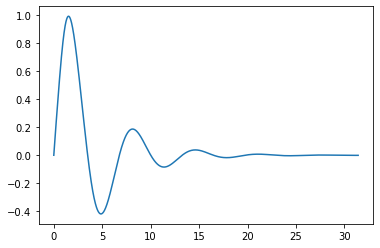

In [4]:
ci = [0,1] #Definimpos la condicion inicial: ci=[x(0),x'(0)]
t_f = 10*pi #Definimos el tiempo final
sol1 = euler(ec,[0,t_f],ci)
t=linspace(0,t_f,1000)
plot(sol1[0],sol1[1][0])
show()

(b) Primero programemos el algoritmo para la integración con el método de Taylor de 2do orden: 

El teorema de Taylor expresado en términos de diferenciales de puede escribir como:

$$
x(t_{i+1})=x(t_i)+hx'(t_i)+\frac{h^2}{2}x''t_i+...
$$

Sustituyendo $x'=f(x,t),x''=f'(x,t)$, etc., y usando la notacion que usamos con '\delta' tenemos::
$$
x_{t_{i+1}}=x_{t_i}+ f(t_{i},x_{i})δ+\frac{f'(t_i, x_{i})}{2}δ^2
$$

La version bidimensional de esta expresion nos permite resolver sistemas de dos ecuaciones diferenciales (es decir con dos incognitas) y es la siguiente:

$$
\vec x_{n+1}=\vec x_n + \delta \vec f(\vec x_n, t_n) + \frac{1}{2} \delta^{2}
\mathbb{J} \cdot \vec f(\vec x_n,t_n)
$$

Lo que cambiamos es la derivada por el Jacobiano, que contiene las derivadas de cada ecuacion respecto a las dos variables desconocidas. Y los escalares por vectores. 


In [5]:
 def taylor_2do(f, t_intervalo, y0, jac, delta=0.01):  #La funcion depende de un vector f de dos incógnitas, el intervalo de
    #tiempo, una condición inicial, el Jacobiano de f y el valor de la separación entre valores delta
    t=arange(t_intervalo[0],t_intervalo[1]+delta,delta) #Arreglo con un numero de puntos entre el punto inicial y final de tiempo (con separación'delta') 
    sol=zeros((len(y0),len(t))) #Se crean dos listas (len(y0)=2) con la misma longitud que tenga la lista de tiempos 't', en ellas se guardaran los puntos solucion de las dos curvas incognitas
    sol[:,0]=y0 #Damos las condiciones iniciales
    for i in range(len(t)-1): #Creamos un ciclo (el rango es este pues ya se lleno el primero)
        sol[:,i+1]=sol[:,i] + delta*f(t[i],sol[:,i])+0.5*(delta**2)*dot(jac(t[i],sol[:,i]),f(t[i],sol[:,i]))
    return (t,sol) 

Ahora, para probar que nuestro algoritmo funciona resolvemos la ecuación diferencial:

$\ddot{x}+0.5\dot{x}+\sin(x)=e^{-t}\sin(3t)$.

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$.

Definimos el jacobiano de la ecuacion diferencial:

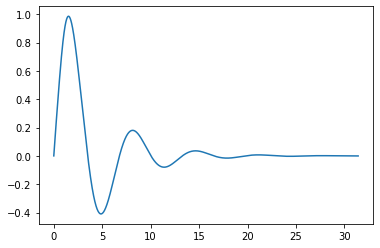

In [6]:
#Definimos el Jacobiano del sistema de Ecuaciones:
def jac1(t,x):
  #x==(x,v)
  return array ([[0,1.0],[-cos(x[0]),-0.5]]) #Derivada de la primer funcion (lado D de la Ec.dif) respecto a x,v. 
#Derivada de la segunda funcion (lado D de la Ec.dif) respecto a x,v
sol2 = taylor_2do(ec,[0,t_f],ci,jac1)
t=linspace(0,t_f,1000)
plot(sol2[0],sol2[1][0])
show()

(c) Primero programemos el algoritmo para la integración con el método de Runge-Kutta de 2◦ orden: 

## Runge-Kutta (RK)

Los métodos de Runge-Kutta (RK) son un conjunto de métodos iterativos (implícitos y explícitos) para la aproximación de soluciones de ecuaciones diferenciales ordinarias, concretamente, del problema de valor inicial.

Sean:

$$ y'(t)=f(t,y(t))$$

una ecuación diferencial ordinaria, con ${\displaystyle f:\Omega \subset \mathbb {R} \times \mathbb {R} ^{n}\to \mathbb {R} ^{n}}$ donde ${\displaystyle \Omega \,}$ es un conjunto abierto, junto con la condición de que el valor inicial de ƒ sea

$${\displaystyle (t_{0},y_{0})\in \Omega .}$$

Entonces el método RK (de orden s) tiene la siguiente expresión, en su forma más general:

$${\displaystyle y_{n+1}=y_{n}+h\,\sum _{i=1}^{s}b_{i}k_{i}} \qquad \qquad (1)$$


donde h es el paso por iteración, o lo que es lo mismo, el incremento ${\displaystyle \Delta t_{n}}$ entre los sucesivos puntos ${\displaystyle t_{n}}$ y ${\displaystyle t_{n+1}}$. Los coeficientes ${\displaystyle k_{i}}$ son términos de aproximación intermedios, evaluados en ƒ de manera local

$${\displaystyle k_{i}=f\left(t_{n}+h\,c_{i}\,,y_{n}+h\,\sum _{j=1}^{s}a_{ij}k_{j}\right)\quad i=1,...,s.} \qquad \qquad (2)$$

con ${\displaystyle a_{ij},b_{i},c_{i}}$ coeficientes propios del esquema numérico elegido, dependiente de la regla de cuadratura utilizada. Los esquemas Runge-Kutta pueden ser explícitos o implícitos dependiendo de las constantes ${\displaystyle a_{ij}}$ del esquema. Si esta matriz es triangular inferior con todos los elementos de la diagonal principal iguales a cero; es decir, ${\displaystyle a_{ij}=0}$ para ${\displaystyle j=i,...,s}$, los esquemas son explícitos.

##  RK Segundo Orden

De (1) y (2), para s=2, obtenemos el método de Runge-Kutta de orden 2 (RK2):

$$ y_{n+1}=y_n+K2+O(h^3)$$

$$ K_1= h f(x_n,y_n) $$

$$ K_2= h f((x_n +h/2),(y_n+ \frac{1}{2}hK_1))$$

La fórmula básicamente calcula el siguiente valor yn + 1 usando yn actual más el promedio ponderado de dos incrementos:


*   $K_1$ es el incremento basado en la pendiente al comienzo del intervalo, usando $y$.
*   $K_2$ es el incremento basado en la pendiente en el punto medio del intervalo, usando $(y + h K1 / 2)$.

El método es un método de segundo orden, lo que significa que el error de truncamiento local es del orden de $O (h^3)$, mientras que el error acumulado total es de orden $O (h^4)$.

A continuación se muestra la implementación de RK2 con la notación vista en clase:


$$
\vec x_{n+1} = \vec x_n + \delta \vec g \left(\vec x_n + \frac {\delta}{2} \vec g (\vec x_n,t_n) , t_n + \frac{\delta}{2}  \right)
$$

In [7]:
def RK2(f, t_intervalo, y0, delta=0.01): #La funcion depende de un vector f de dos incógnitas, el intervalo de
    #tiempo, una condición inicial y el valor de la separación entre valores delta
    t=arange(t_intervalo[0],t_intervalo[1]+delta,delta) #Arreglo con un numero de puntos entre el punto inicial y final de tiempo (con separación'delta'sol=zeros((len(y0),len(t))) #Sol=zeros.like(t)
    sol=zeros((len(y0),len(t)))
    sol[:,0]=y0 #sol[0] para usar escalares en lugar de vectores
    for i in range(len(t)-1): #Creamos un ciclo
        vec_n= sol[:,i] + 0.5*delta*f(t[i],sol[:,i]) #f es la funcion a la derecha de la ecuacion diferencial (como en este caso es un sistema de ecs, tndremos dos listas, una para la slucion de cada una)
        sol[:,i+1]=sol[:,i] + delta*f(t[i]+0.5*delta,vec_n)
    return (t,sol)

Ahora, para probar que nuestro algoritmo funciona resolvemos la ecuación diferencial:

$\ddot{x}+0.5\dot{x}+\sin(x)=e^{-t}\sin(3t)$.

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$.

In [8]:
def ec(t,x):
    # x es (x,dx) 
    dx = x[1]
    dvx = -0.5*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
    return array([dx,dvx])

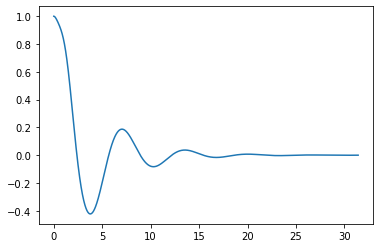

In [9]:
sol = RK2(ec , [0,10*pi] , [1,0] )
plot(sol[0],sol[1][0])
show()

(d) Primero programemos el algoritmo para la integración con el método de Runge-Kutta de 4◦ orden: 

###  RK de orden 4 (RK4)

De (1) y (2), para s=4, obtenemos el método de RK4:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 x_{i+1} = x_i +\Delta x \\
		 y_{i+1} = y_i + \frac{\Delta x}{6} \left( K_1 + 2K_2 +2 K_3 +K_4 \right)
	       \end{array}
	     \right.
\end{equation}

donde: 

\begin{equation}
\left\{
	       \begin{array}{ll}
		 K_1 = f(x_i,y_i) \\
		 K_2 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} K_1\right) \\
         K_3 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} K_2\right) \\
         K_4 = f(x_i +\Delta x,y_i +\Delta x K_3)
	       \end{array}
	     \right.
\end{equation}

De aqui vemos que el método RK4 toma una mejor estimacion de la pendiente, ya que (dado un intervalo $[x_i,x_{i+1}]$) considera un promedio ponderado de la pendiente en el extremo izquierdo $K_1$, dos pendientes mejoradas en el punto medio $K_2$ y $K_3$ y una pendiente en el extremo derecho $K_4$. 

Usando la notación vista en clase:


$$
\vec x_{n+1} = \vec x_n + \frac{\delta}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$
Donde 
$$
k_1= \vec g \left(\vec x_n, t_n \right)
$$
$$
k_2= \vec g \left(\vec x_n + \delta \frac{k_1}{2}, t_n+\frac{\delta}{2} \right)
$$
$$
k_3= \vec g \left(\vec x_n + \delta \frac{k_2}{2}, t_n+\frac{\delta}{2} \right)
$$
$$
k_4= \vec g \left(\vec x_n + \delta k_3, t_n+\delta \right)
$$

Ahora, para probar que nuestro algoritmo funciona resolvemos la ecuación diferencial:

$\ddot{x}+0.5\dot{x}+\sin(x)=e^{-t}\sin(3t)$.

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$.

In [10]:
def RK4(f, t_intervalo, y0, delta=0.000001): #La funcion depende de un vector f de dos incógnitas, el intervalo de
    #tiempo, una condición inicial y el valor de la separación entre valores delta
    t=arange(t_intervalo[0],t_intervalo[1]+delta,delta) #Arreglo con un numero de puntos entre el punto inicial y final de tiempo (con separación'delta')
    sol=zeros((len(y0),len(t))) #Se crean dos listas (len(y0)=2) con la misma longitud que tenga la lista de tiempos 't', sol[:,0]=y0 #Damos las condiciones iniciales
    sol[:,0]=y0 #sol[0] para usar escalares en lugar de vectores
    for i in range(len(t)-1): #Pues el primer elemento de las listas de ''sol'' ya fueron llenadas con las condiciones iniciales
        #Se definen las cuatro aproximaciones de la pendiente 
        k1= f(t[i],sol[:,i])
        k2=f(t[i]+ 0.5*delta, sol[:,i] + 0.5* delta*k1)
        k3=f(t[i]+ 0.5*delta, sol[:,i] + 0.5* delta*k2)
        k4=f(t[i]+ delta, sol[:,i] +  delta*k3)
        sol[:,i+1]=sol[:,i] + (delta/6)*(k1+2*k2 + 2*k3 + k4) #Se calcula el siguiente punto solucion en funcion del ultimo, y de las aproximaciones anteriores
    return (t,sol)

Ahora, para probar que nuestro algoritmo funciona resolvemos la ecuación diferencial:

$\ddot{x}+0.5\dot{x}+\sin(x)=e^{-t}\sin(3t)$.

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$.

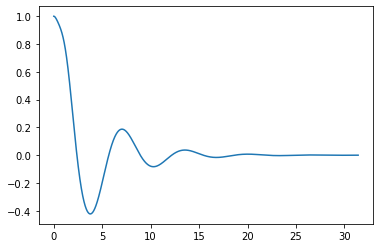

In [11]:
sol = RK4(ec , [0,10*pi] , [1,0] )
plot(sol[0],sol[1][0])
show()

Con esto verificamos el correcto funcionamiento de los 4 métodos.

2.Utilizando los integradores anteriores encuentre un paso que le asegure que la solucion tenga por lo
menos 4 cifras significativas en el resultado de integraci ́on. La ecuaci ́on es la siguiente:

$$
\dddot{ y}+\ddot{y}^2-3\dot{y}^3+\cos^2(y)=e^{-t}\sin(3t).
$$

Con condiciones iniciales $\ddot{y}(1)=1$, $\dot{y}(1)=2$ y $y(0)=01$. En particular que sucede en el intervalo $t \in [1, 2]$
y $t \in [1, 2.1]$.

In [12]:
#Definimos el sistema de ecuaciones diferenciales
def ec2(t,y):
    # y es (y,dy,ddy) 
    dy = y[1]
    dvy = y[2]
    ddy = -y[2]**2 + 3*y[1]**3 - (cos(y[0]))**2 + exp(-t)*sin(3*t) #Despejada de la ecuacion diferencial
    return array([dy,dvy,ddy])

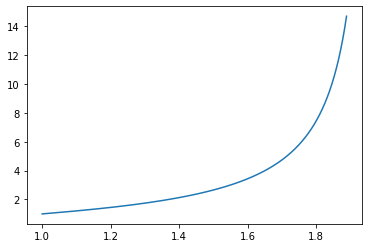

In [13]:
#Definimos la condicion inicial:
ci = [1,2,1]
#Calculamos la solucion con el metodo de RK4
sol2 = RK4(ec2,(1,1.8889),ci)
plot(sol2[0],sol2[1][0])
show()

A primera vista, hay un problema a partir de aproximadamente 1.8, ya que ahí, se presentan indeterminaciones, por lo que la presentada arriba es la grafica más aproximada que podemos obtener para la solucion en el intervalo $ t\in[1,2]$ ya que diverge en $t=2$ y al al intentar graficarla cerca de ese punto obtenemos formas extrañas.

Por otro lado, si nos fijamos qué pasa cuando $ t\in[2,2.1]$, sí vamos a obtener las soluciones con cada uno de los métodos mencionados arriba, encontrando en cada caso el paso adecuado, para lograr que el error numérico no se alcance mucho antes de t=2, que se eligió con un valor de  $ \delta=0.000001$ con el costo de much tiemopo de ejecución, pero para el cual obtenemos una precisión de $10^{−4}$, i.e. que obtenemos al menos 4 cifras significativas:

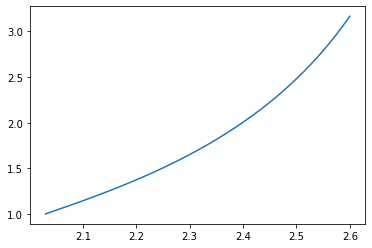

In [14]:
#Definimos la condicion inicial:
ci = [1,2,1]
#Calculamos la solucion con el metodo de RK4
sol2 = RK4(ec2,(2.03,2.6),ci)
plot(sol2[0],sol2[1][0])
show()

In [15]:
print(sol2[0],sol2[1][0])

[2.03     2.030001 2.030002 ... 2.599999 2.6      2.600001] [1.         1.000002   1.000004   ... 3.16612818 3.16613661 3.16614503]


3.Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos
opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parametros
al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación
diferencial

$$
\ddot{x}+\frac{1}{10}\dot{x}+4\sin(x)=\frac{1}{2}\sin(\omega t)
$$

Con condiciones iniciales  ̇$\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega ={1, 1.1, 1.2, 1.3, ..., 2.9, 3}$. Realice la gráfica
de algunas soluciones que representen el comportamiento de la solución en funci ́on de $\omega$ y explique su
resultado.

Primero vamos a definir la ecuación a resolver:

In [16]:
def ec3(t,x,omega=1):
    # x es (x,dx) 
    dx = x[1]
    dvx = -0.1*x[1] - 4*sin(x[0]) + 0.5*sin(omega*t)
    return array([dx,dvx])

In [17]:
#Algoritmo RK4 modificado
def RK4o(f, t_intervalo, y0, omega=1, delta=0.001):
    t=arange(t_intervalo[0],t_intervalo[1]+delta,delta) #Arreglo con un numero de puntos entre el punto inicial y final con distancia 'delta' 
    sol=zeros((len(y0),len(t))) #Se crean dos listas (len(y0)=2) con la misma longitud de la lista de tiempos para guardar las soluciones
    sol[:,0]=y0  #Condiciones iniciales de los primeros dos puntos
    for i in range(len(t)-1): #Pues el primer elemento de las listas de 'sol' ya fueron llenadas con las condiciones iniciales
        #Se definen las cuatro aproximaciones de la pendiente 
        k1= f(t[i],sol[:,i], omega) 
        k2=f(t[i]+ 0.5*delta, sol[:,i] + 0.5* delta*k1, omega)
        k3=f(t[i]+ 0.5*delta, sol[:,i] + 0.5* delta*k2, omega)
        k4=f(t[i]+ delta, sol[:,i] +  delta*k3, omega)
        sol[:,i+1]=sol[:,i] + (delta/6)*(k1+2*k2 + 2*k3 + k4) #Se calcula el siguiente punto solucion en funcion del ultimo, y de las aproximaciones anteriores
    return (t,sol) 

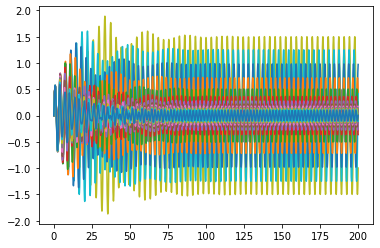

In [18]:
ci = [0,1] #Condicion inicial
omegas = arange(1,3.1,0.1) #Arreglo con las omega's
t_f = 200 #Se elige un tiempo final 
for i in range(len(omegas)): #Este ciclo se repite para cada una de las omega's 
    sol3= RK4o(ec3,(0,t_f),ci, omega=omegas[i]) #Se calcula la solucion para el valor de omega en la posicion 'i' de la lista 'omegas'
    plot(sol3[0],sol3[1][0]) #Se grafica dicha solucion  
show()

In [20]:
print(sol3[0][150000])

150.0


Como funcion de omega, hay una característica particular que vemos al momento de graficar: la amplitud, sobre todo en tiempos mayores, donde se vuelve casi constante en  $t<150$, por ello pondremos nuestra atencion en los valores de la curva solucion a partir de este tiempo:

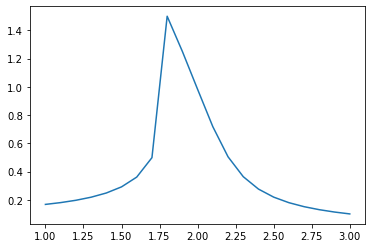

In [21]:
#Lista con las amplitudes de las soluciones graficadas:
amplitudes = zeros(len(omegas)) #Definimos la lista inicialmente con ceros
t=arange(150,t_f+0.001,0.001) #Hacemos una partición entre  t=150 y t=200 
solucion_tiempos_finales=zeros(len(t)) #Con la longitud del arreglo anterior 
for i in range(len(omegas)): #Este ciclo se repite  
    sol3= RK4o(ec3,(0,t_f),ci, omega=omegas[i]) #Se calcula la solucion para el valor de omegas[i]
    for j in range(150000,200001): #por lo mencionado,nos interesa la solucion a partir del punto 150,000
        solucion_tiempos_finales[j-150000]=sol3[1][0][j] #Llenamos la lista con las soluciones
        amplitudes[i] = max(solucion_tiempos_finales) #Se calcula la amplitud maxima y se guarda
plot(omegas,amplitudes)
show()

Esta grafica nos dice que la amplitud máxima es aprox. $\omega ≈ 1.7$. Esto era de esperarse pues sabemos que la amplitud de la solucion crece conforme $\omega$ se acerque a la frecuencia natural.

Ahora, el valor de ω no influye en la obtención de las cifras significativas ya que se trata de un parámetro constante.
Podemos notar que tanto para x(t), como v(t), tenemos un fenómeno de resonancia. Asimismo, conforme el sistema va avanzando en el tiempo, la amplitud de las soluciones va creciendo, haciendo que mientras mayor sea el valor de ω también sea mayor el valor de la amplitud.

4.Considere el siguiente sistema de ecuaciones diferenciales

$$
\frac{dx}{dt}=10(y-x)
$$

$$
\frac{dy}{dt}=x(28-z)-y
$$

$$
\frac{dz}{dt}=xy-\frac{3}{8}z
$$

Realice una integracipon numérica del sistema de ecuaciones con alguno de los integradores del problema 1 (el que más le guste) y realice los siguientes ejercicios:


Explique lo que observa.
Nota: De preferencia realice integraciones con tiempos relativamente largos en los que pueda
apreciar diferencias en el comportamiento de las soluciones. Además asegure que cada una de las
soluciones que encuentre sea convergente, es decir encuentre un paso adecuado para realizar la
integración.

(a) Elija una condición inicial aleatoria en el $x, y, z \in [−5, 5]$ y realice la gráfica de la solución en el
plano xy, xz y yz y comente sus observaciones.

Pero primero usemos un algortirmo RK4 con un paso más peueño para ahorrar tiempos, la explicación del algoritmo ya esta en el problema 1, así que omitiremos esta parte:

In [22]:
def RK44(f, t_intervalo, y0, delta=0.001): 
    t=arange(t_intervalo[0],t_intervalo[1]+delta,delta) 
    sol=zeros((len(y0),len(t))) 
    sol[:,0]=y0 #sol[0] para usar escalares en lugar de vectores
    for i in range(len(t)-1): 
        #Se definen las cuatro aproximaciones de la pendiente 
        k1= f(t[i],sol[:,i])
        k2=f(t[i]+ 0.5*delta, sol[:,i] + 0.5* delta*k1)
        k3=f(t[i]+ 0.5*delta, sol[:,i] + 0.5* delta*k2)
        k4=f(t[i]+ delta, sol[:,i] +  delta*k3)
        sol[:,i+1]=sol[:,i] + (delta/6)*(k1+2*k2 + 2*k3 + k4)
    return (t,sol)

In [23]:
def ec4(t,x):
    # x es (x,y,z) 
    dx = 10*(x[1]-x[0])
    dy = x[0]*(28-x[2]) -x[1]
    dz = x[0]*x[1] - (8/3)*x[2]
    return array([dx,dy,dz])

Eligiendo valores aleatorios entre -5 y 5 tenemos:

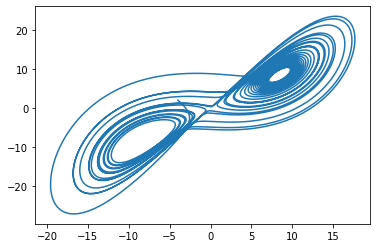

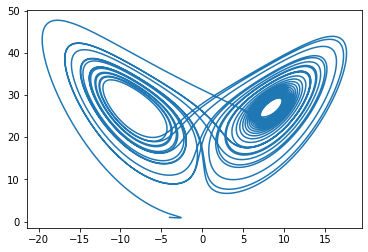

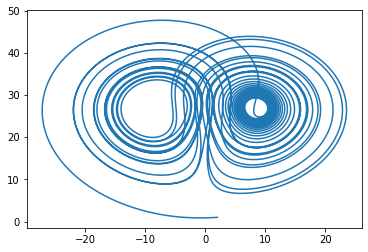

In [24]:
ci = [-4,2,1]
sol4 = RK44(ec4,(0,30,20000),ci)
#print(solucion_p4)
plot(sol4[1][0], sol4[1][1]) #xy
show()
plot(sol4[1][0], sol4[1][2]) #xz
show()
plot(sol4[1][1], sol4[1][2]) #yz
show()

Podemos ver que tenemos almenos 5 cifras significativas:

In [36]:
print(sol4[1][0], sol4[1][1])

[-4.         -3.96023832 -3.92193576 ...  9.93211427  9.85776131
  9.78335001] [ 0.05       -0.05746148 -0.16377181 ...  2.50021445  2.41930937
  2.33977991]


En las 3 gráficas obtenemos la misma forma pero vista desde distintos ángulos. Asimismo, podemos ver que conforme el tiempo va creciendo, aparecen más líneas que siguen la misma trayectoria, además, tienen una zona bien delimitada del espacio de fases en la que las líneas de la trayectoria del sistema nunca se cortan, líneas de longitud infinita confinadas en área finita, describiendo órbitas no periódicas.

(b) Ahora tome 3 soluciones parecidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en y las condiciones iniciales difieran entre si en $10^{−2}$

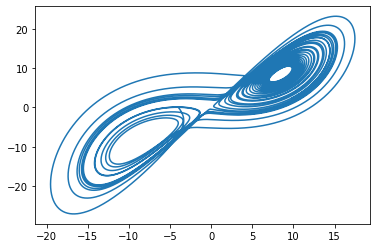

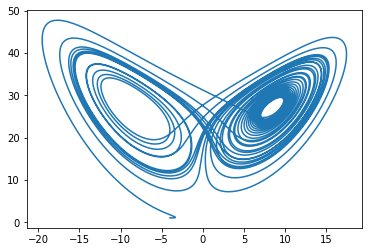

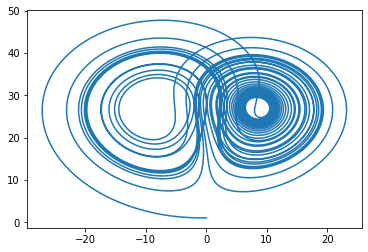

In [25]:
ci = [-4,0.05,1]
sol4 = RK44(ec4,(0,30,20000),ci)
#print(solucion_p4)
plot(sol4[1][0], sol4[1][1]) #xy
show()
plot(sol4[1][0], sol4[1][2]) #xz
show()
plot(sol4[1][1], sol4[1][2]) #yz
show()

Podemos ver que tenemos almenos 5 cifras significativas:

In [26]:
print(sol4[1][0], sol4[1][1])

[-4.         -3.96023832 -3.92193576 ...  9.93211427  9.85776131
  9.78335001] [ 0.05       -0.05746148 -0.16377181 ...  2.50021445  2.41930937
  2.33977991]


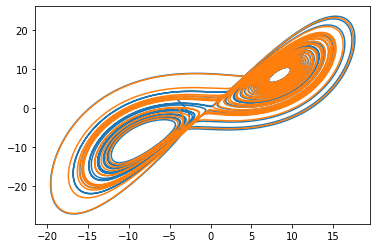

In [30]:
ci = [-4,2,1]
sol4 = RK44(ec4,(0,30,20000),ci)
plot(sol4[1][0], sol4[1][1]) #xy
si = [-4,0.05,1]
sol4 = RK44(ec4,(0,30,20000),si)
plot(sol4[1][0], sol4[1][1]) #xy
show()


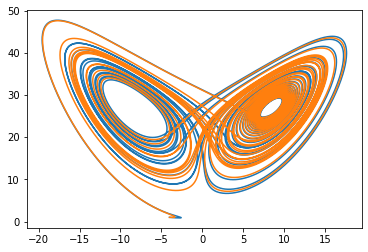

In [31]:
ci = [-4,2,1]
sol4 = RK44(ec4,(0,30,20000),ci)
plot(sol4[1][0], sol4[1][2]) #xz
si = [-4,0.05,1]
sol4 = RK44(ec4,(0,30,20000),si)
plot(sol4[1][0], sol4[1][2]) #xz
show()

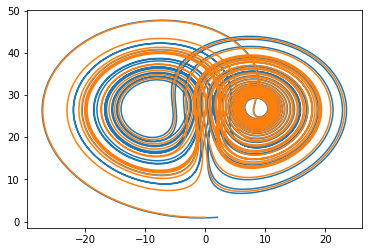

In [33]:
ci = [-4,2,1]
sol4 = RK44(ec4,(0,30,20000),ci)
plot(sol4[1][1], sol4[1][2]) #yz
si = [-4,0.05,1]
sol4 = RK44(ec4,(0,30,20000),si)
plot(sol4[1][1], sol4[1][2]) #yz
show()

Observando las gráficas anteriores, podemos deducir que este se trata de un Atractor de Lorenz, que es conocido por tener una estructura fractal; podemos notar que todas las soluciones tienen la misma forma sin importar la condición inicial,a pesar de que los valores generados nunca se repiten y de que las condiciones iniciales pueden hacer variar completamente los valores generados (de ahí su nombre de atractor extraño o caótico), el atractor toma una forma única y parece conservar cierto orden, sus infinitas trayectorias nunca se cortan (pues eso implicaría que entraríamos en un ciclo periódico), y también podemos comprobar cómo este objeto presenta la autosimilitud característica de los fractales. sin embargo si se puede apreciar un ligero desfase entre ellas (ya que se pueden distinguir los 3 colores), por lo que no podemos decir que son iguales, lo cual tiene sentido ya que las soluciones dependen justo de las condiciones iniciales que se tengan.

Extra: Utilice el integrador de SciPy (solve ivp) para obtener una soluci ́on con un error de 10−8 y que además
sea densa para resolver los problemas 3 y 4.

Vamos a resolver las ecuaciones de los problemas 3 y 4 con SciPy, que son las siguientes:

# Problema 3 
$$
\ddot{x}+\frac{1}{10}\dot{x}+4\sin(x)=\frac{1}{2}\sin(\omega t)
$$

Con condiciones iniciales  ̇$\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega ={1, 1.1, 1.2, 1.3, ..., 2.9, 3}$

# Problema 4

$$
\frac{dx}{dt}=10(y-x)
$$

$$
\frac{dy}{dt}=x(28-z)-y
$$

$$
\frac{dz}{dt}=xy-\frac{3}{8}z
$$

In [37]:
def ec_prob3(t,x,omega=1):
    # x es (x,dx) 
    dx = x[1]
    dvx = -0.1*x[1] - 4*sin(x[0]) + 0.5*sin(omega*t)
    return array([dx,dvx])

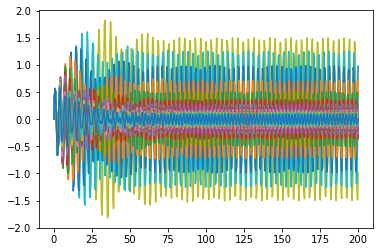

In [38]:
ci = [0,1] #definimos las condiciones iniciales
omegas = arange(1,3.1,0.1)
t_f = 200
amplitudes = zeros(len(omegas))
t = linspace(0,t_f,500) 
for i in range(len(omegas)):
    solucion_p1 = solve_ivp(ec_prob3,(0,t_f),ci,args=(omegas[i],),
                            dense_output=True)
    t_finales = linspace(150,t_f,500)
    amplitudes[i] = max(abs(solucion_p1.sol(t_finales)[0]))
    plot(t,solucion_p1.sol(t)[0])
show()

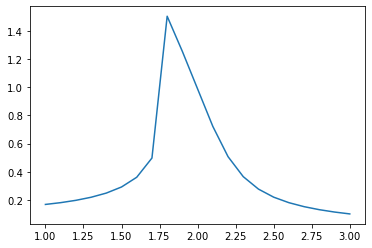

In [39]:
plot(omegas,amplitudes)
show()

In [44]:
#podemos ver que hay al menos 8 cifras significativas
print(t,solucion_p1.sol(t)[0])

[0.00000000e+00 1.50075038e-02 3.00150075e-02 ... 2.99699850e+01
 2.99849925e+01 3.00000000e+01] [ 0.          0.01499484  0.02995877 ... -0.04557236 -0.04775883
 -0.04979577]


In [40]:
def ec_prob4(t,x):
    # x es (x,y,z) 
    dx = 10*(x[1]-x[0])
    dy = x[0]*(28-x[2]) -x[1]
    dz = x[0]*x[1] - (8/3)*x[2]
    return array([dx,dy,dz])

In [41]:
ci = [2,3,1.5]
solucion_p4 = solve_ivp(ec_prob4,(0,30),ci,dense_output=True)

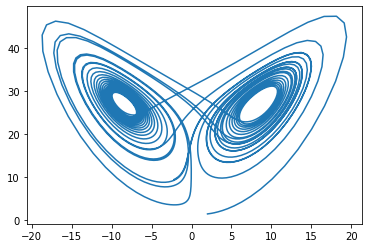

In [42]:
t = linspace(0,30,2000)
plot(solucion_p4.sol(t)[0],solucion_p4.sol(t)[2])
show()

In [43]:
#podemos ver que hay al menos 8 cifras significativas

print(solucion_p4.sol(t)[0],solucion_p4.sol(t)[2],t)

[ 2.          2.19419247  2.47552981 ... -1.69486314 -1.92232813
 -2.18419927] [ 1.5         1.54552609  1.6292116  ... 10.07806961  9.77111887
  9.50255397] [0.00000000e+00 1.50075038e-02 3.00150075e-02 ... 2.99699850e+01
 2.99849925e+01 3.00000000e+01]
